<a href="https://colab.research.google.com/github/spatank/Curiosity/blob/master/v8/C_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Curiosity_v8/')

Mounted at /content/drive


In [2]:
!ls # run !ls to verify location

build_Wiki_networks.ipynb	persistent_homology_simulations.ipynb
C_plotting.ipynb		persistent_homology_Wiki.ipynb
Figures				PH_plotting.ipynb
KNOT				Simulations
mech_plotting.ipynb		Wiki
persistent_homology_KNOT.ipynb


In [3]:
import glob
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import sys
!{sys.executable} -m pip install traces

import traces

def time_normalize_and_merge(timeseries_lst, make_1_1 = False):
    """
    Takes in a list of time series (of possibly different lengths) and
    subsamples them using traces so they all range from 0 and 1 and are defined
    on the same points.
    """
    n_series = len(timeseries_lst)
    timeseries_lst = [traces.TimeSeries(zip(*(np.linspace(0, 1, len(ts)), ts)))
                      for ts in timeseries_lst]
    timeseries_lst = traces.TimeSeries.merge(timeseries_lst)
    if make_1_1:
        timeseries_lst[1.0] = [1.0] * n_series
    X = list(zip(*timeseries_lst.items()))[0]  # x values
    Y = list(zip(*timeseries_lst.items()))[1]  # y values across all series
    return X, Y

def plot_curve(curves_lst, curve_label = 'none', curve_color = 'none', null = 'none'):
  """
  Accepts a list of curves and the identity of the null model used if the data 
  come from one; curve_label and curve_color arguments are used for plotting.
  Plots average curve with a standard deviation/error band. 
  """
  
  max_nodes = max([len(lst) for lst in curves_lst])
  curves_mat = np.empty([len(curves_lst), max_nodes])
  curves_mat[:] = np.nan
  for i, j in enumerate(curves_lst):
    curves_mat[i][0:len(j)] = j
  numels = np.count_nonzero(~np.isnan(curves_mat), axis = 0)
  mean = np.nanmean(curves_mat, axis = 0)[numels != 1]
  std = np.nanstd(curves_mat, axis = 0)[numels != 1]
  # mins = mean - std
  mins = mean - np.divide(std, np.sqrt(numels[numels != 1]))
  mins = np.maximum(0, mins)
  # maxes = mean + std
  maxes = mean + np.divide(std, np.sqrt(numels[numels != 1]))
  X = np.arange(len(numels[numels != 1]))

  plt.plot(X, mean, color = curve_color, label = curve_label,
            linewidth = 1)
  # plt.gca().set_aspect(1./plt.gca().get_data_ratio())
  plt.fill_between(X, mins, maxes, facecolor = curve_color, alpha = 0.2)



def plot_curve_normalized_idx(curves_lst, curve_label = 'none', curve_color = 'none', null = 'none'):
  """
  Accepts a list of curves and the identity of the null model used if the data 
  come from one; curve_label and curve_color arguments are used for plotting.
  Plots average curve with a standard deviation/error band, and with the x-axis 
  normalized to be [0, 1].
  """
  
  X, Y = time_normalize_and_merge(curves_lst)
  mean = np.nanmean(Y, axis = 1)
  mins = np.nanmean(Y, axis = 1) - np.nanstd(Y, axis = 1)
  # mins = np.nanmean(Y, axis = 1) - np.nanstd(Y, axis = 1)/np.sqrt(len(curves_lst))
  mins = np.maximum(0, mins)
  maxes = np.nanmean(Y, axis = 1) + np.nanstd(Y, axis = 1)
  # maxes = np.nanmean(Y, axis = 1) + np.nanstd(Y, axis = 1)/np.sqrt(len(curves_lst))

  plt.plot(X, mean, color = curve_color, label = curve_label,
            linewidth = 1)
  # plt.gca().set_aspect(1./plt.gca().get_data_ratio())
  plt.fill_between(X, mins, maxes, facecolor = curve_color, alpha = 0.2)

  Created wheel for infinity: filename=infinity-1.5-py3-none-any.whl size=3095 sha256=8344353ffdbffd5b5ffc3b1d35a5a8b034bdda28088ce5d88de3d68756b99fa9
  Stored in directory: /root/.cache/pip/wheels/ee/2c/f4/26985d995b1d5930ab73914f76ffccd54b1af31c2e68b507bc
Successfully built infinity


# KNOT

In [5]:
base_path = '/content/drive/My Drive/Curiosity_v8/KNOT/Processed/C/'

In [6]:
files = glob.glob(base_path + '*.mat')

## All Participants

In [7]:
files = glob.glob(base_path + '*.mat')

all_num_nodes = []
all_clust_coef = []
all_clust_coef_edge_rewired = []
all_clust_coef_latticized = []
all_C = []
all_C_edge_rewired = []
all_C_latticized = []
all_C_norm = []
all_C_norm_edge_rewired = []
all_C_norm_latticized = []
all_entropy = []
all_entropy_edge_rewired = []
all_entropy_latticized = []

for idx, C_file in enumerate(files):
  data_dict = sio.loadmat(C_file)
  num_nodes = data_dict['n']
  all_num_nodes.append(num_nodes)

  all_clust_coef.append(np.squeeze(data_dict['clust_coef']))
  clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
  all_clust_coef_edge_rewired.append(list(np.nanmean(clust_coef_edge_rewired, axis = 0)))
  clust_coef_latticized = data_dict['clust_coef_latticized']
  all_clust_coef_latticized.append(list(np.nanmean(clust_coef_latticized, axis = 0)))

  all_C.append(np.squeeze(data_dict['C']))
  C_edge_rewired = data_dict['C_edge_rewired']
  all_C_edge_rewired.append(list(np.nanmean(C_edge_rewired, axis = 0)))
  C_latticized = data_dict['C_latticized']
  all_C_latticized.append(list(np.nanmean(C_latticized, axis = 0)))

  all_C_norm.append(np.squeeze(data_dict['C_norm']))
  C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
  all_C_norm_edge_rewired.append(list(np.nanmean(C_norm_edge_rewired, axis = 0)))
  C_norm_latticized = data_dict['C_norm_latticized']
  all_C_norm_latticized.append(list(np.nanmean(C_norm_latticized, axis = 0)))

  all_entropy.append(np.squeeze(data_dict['entropy']))
  entropy_edge_rewired = data_dict['entropy_edge_rewired']
  all_entropy_edge_rewired.append(list(np.nanmean(entropy_edge_rewired, axis = 0)))
  entropy_latticized = data_dict['entropy_latticized']
  all_entropy_latticized.append(list(np.nanmean(entropy_latticized, axis = 0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


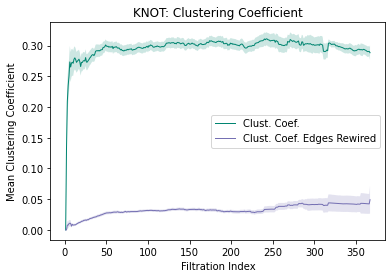

In [8]:
plot_curve(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve(all_clust_coef_edge_rewired, curve_label = 'Clust. Coef. Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_clust_coef_latticized, curve_label = 'Clust. Coef. Latticized', curve_color = '#d95f02')
plt.title('KNOT: Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = 'center right')
plt.savefig('Figures/C/all_KNOT_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


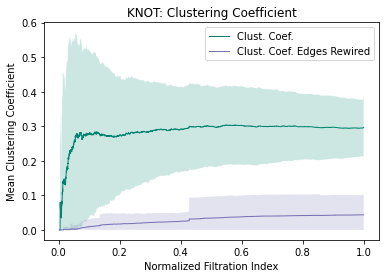

In [9]:
plot_curve_normalized_idx(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve_normalized_idx(all_clust_coef_edge_rewired, curve_label = 'Clust. Coef. Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_clust_coef_latticized, curve_label = 'Clust. Coef. Latticized', curve_color = '#d95f02')
plt.title('KNOT: Clustering Coefficient')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = 'upper right')
plt.savefig('Figures/C/all_KNOT_clust_coef_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


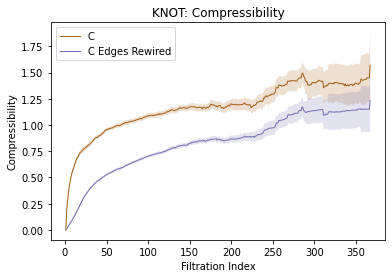

In [10]:
plot_curve(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve(all_C_edge_rewired, curve_label = 'C Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_C_latticized, curve_label = 'C Latticized', curve_color = '#d95f02')
plt.title('KNOT: Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = 'upper left')
plt.savefig('Figures/C/all_KNOT_C.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


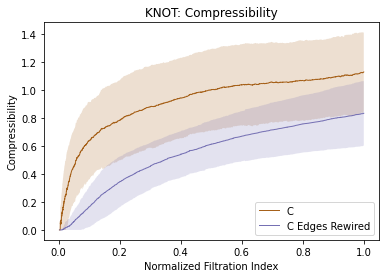

In [11]:
plot_curve_normalized_idx(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve_normalized_idx(all_C_edge_rewired, curve_label = 'C Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_C_latticized, curve_label = 'C Latticized', curve_color = '#d95f02')
plt.title('KNOT: Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = 'lower right')
plt.savefig('Figures/C/all_KNOT_C_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


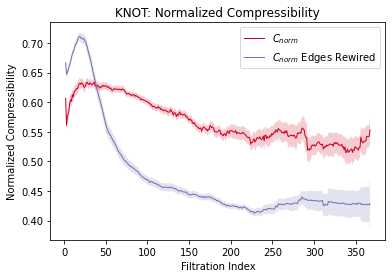

In [12]:
plot_curve(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve(all_C_norm_edge_rewired, curve_label = '$C_{norm}$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_C_norm_latticized, curve_label = '$C_{norm}$ Latticized', curve_color = '#d95f02')
plt.title('KNOT: Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = 'upper right')
plt.savefig('Figures/C/all_KNOT_C_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


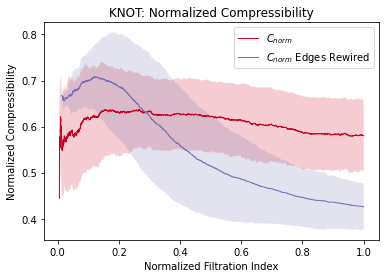

In [13]:
plot_curve_normalized_idx(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve_normalized_idx(all_C_norm_edge_rewired, curve_label = '$C_{norm}$ Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_C_norm_latticized, curve_label = '$C_{norm}$ Latticized', curve_color = '#d95f02')
plt.title('KNOT: Normalized Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = 'upper right')
plt.savefig('Figures/C/all_KNOT_C_norm_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


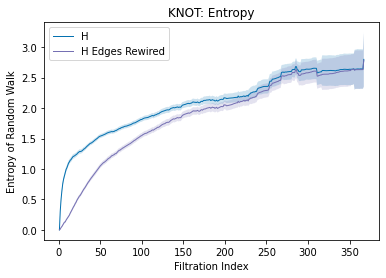

In [14]:
plot_curve(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve(all_entropy_edge_rewired, curve_label = 'H Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_entropy_latticized, curve_label = 'H Latticized', curve_color = '#d95f02')
plt.title('KNOT: Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = 'upper left')
plt.savefig('Figures/C/all_KNOT_entropy.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


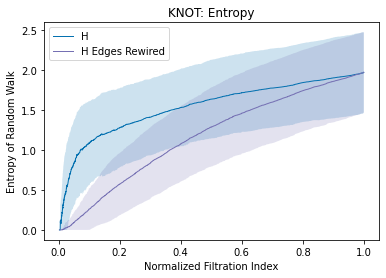

In [15]:
plot_curve_normalized_idx(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve_normalized_idx(all_entropy_edge_rewired, curve_label = 'H Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_entropy_latticized, curve_label = 'H Latticized', curve_color = '#d95f02')
plt.title('KNOT: Entropy')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = 'upper left')
plt.savefig('Figures/C/all_KNOT_entropy_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## One Participant

In [16]:
subj_ID = 106

data_dict = sio.loadmat(base_path + 'subj_' + str(subj_ID) + '_C.mat')

num_nodes = data_dict['n']

clust_coef = np.squeeze(data_dict['clust_coef'])
clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
clust_coef_latticized = data_dict['clust_coef_latticized']

C = np.squeeze(data_dict['C'])
C_edge_rewired = data_dict['C_edge_rewired']
C_latticized = data_dict['C_latticized']

C_norm = np.squeeze(data_dict['C_norm'])
C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
C_norm_latticized = data_dict['C_norm_latticized']

entropy = np.squeeze(data_dict['entropy'])
entropy_edge_rewired = data_dict['entropy_edge_rewired']
entropy_latticized = data_dict['entropy_latticized']

X = np.arange(num_nodes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


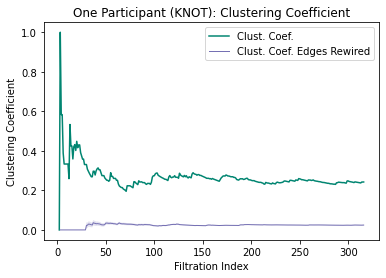

In [17]:
plt.plot(X, clust_coef, color = '#018571', label = 'Clust. Coef.')
plot_curve(clust_coef_edge_rewired, curve_label = 'Clust. Coef. Edges Rewired', curve_color = '#7570b3')
# plot_curve(clust_coef_latticized, curve_label = 'Clust. Coef. Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Clustering Coefficient')
plt.legend(loc = 'upper right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


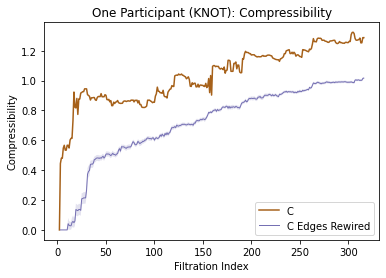

In [18]:
plt.plot(X, C, color = '#a6611a', label = 'C')
plot_curve(C_edge_rewired, curve_label = 'C Edges Rewired', curve_color = '#7570b3')
# plot_curve(C_latticized, curve_label = 'C Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


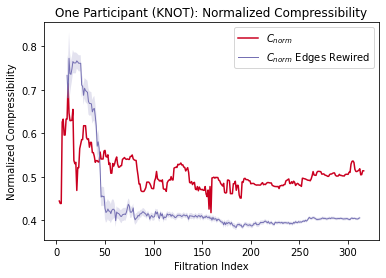

In [19]:
plt.plot(X, C_norm, color = '#ca0020', label = '$C_{norm}$')
plot_curve(C_norm_edge_rewired, curve_label = '$C_{norm}$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(C_norm_latticized, curve_label = '$C_{norm}$ Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = 'upper right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


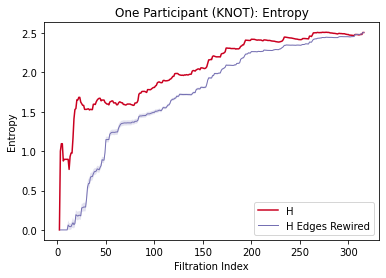

In [20]:
plt.plot(X, entropy, color = '#ca0020', label = 'H')
plot_curve(entropy_edge_rewired, curve_label = 'H Edges Rewired', curve_color = '#7570b3')
# plot_curve(entropy_latticized, curve_label = 'H Latticized', curve_color = '#d95f02')
plt.title('One Participant (KNOT): Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.legend(loc = 'lower right')

# Wikipedia Networks

In [21]:
base_path = '/content/drive/My Drive/Curiosity_v8/Wiki/Processed/C/'

In [22]:
files = glob.glob(base_path + '*.mat')

## All Topics

In [23]:
all_num_nodes = []
all_clust_coef = []
all_clust_coef_edge_rewired = []
all_clust_coef_latticized = []
all_C = []
all_C_edge_rewired = []
all_C_latticized = []
all_C_norm = []
all_C_norm_edge_rewired = []
all_C_norm_latticized = []
all_entropy = []
all_entropy_edge_rewired = []
all_entropy_latticized = []

for idx, C_file in enumerate(files):
  data_dict = sio.loadmat(C_file)
  num_nodes = data_dict['n']
  all_num_nodes.append(num_nodes)

  all_clust_coef.append(np.squeeze(data_dict['clust_coef']))
  clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
  all_clust_coef_edge_rewired.append(list(np.nanmean(clust_coef_edge_rewired, axis = 0)))
  clust_coef_latticized = data_dict['clust_coef_latticized']
  all_clust_coef_latticized.append(list(np.nanmean(clust_coef_latticized, axis = 0)))

  all_C.append(np.squeeze(data_dict['C']))
  C_edge_rewired = data_dict['C_edge_rewired']
  all_C_edge_rewired.append(list(np.nanmean(C_edge_rewired, axis = 0)))
  C_latticized = data_dict['C_latticized']
  all_C_latticized.append(list(np.nanmean(C_latticized, axis = 0)))

  all_C_norm.append(np.squeeze(data_dict['C_norm']))
  C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
  all_C_norm_edge_rewired.append(list(np.nanmean(C_norm_edge_rewired, axis = 0)))
  C_norm_latticized = data_dict['C_norm_latticized']
  all_C_norm_latticized.append(list(np.nanmean(C_norm_latticized, axis = 0)))

  all_entropy.append(np.squeeze(data_dict['entropy']))
  entropy_edge_rewired = data_dict['entropy_edge_rewired']
  all_entropy_edge_rewired.append(list(np.nanmean(entropy_edge_rewired, axis = 0)))
  entropy_latticized = data_dict['entropy_latticized']
  all_entropy_latticized.append(list(np.nanmean(entropy_latticized, axis = 0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


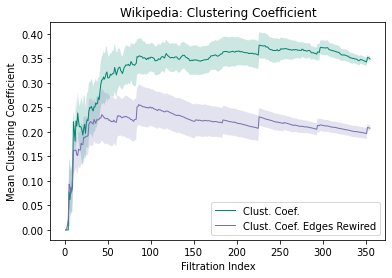

In [24]:
plot_curve(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve(all_clust_coef_edge_rewired, curve_label = 'Clust. Coef. Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_clust_coef_latticized, curve_label = 'Clust. Coef. Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = 'lower right')
plt.savefig('Figures/C/all_Wiki_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


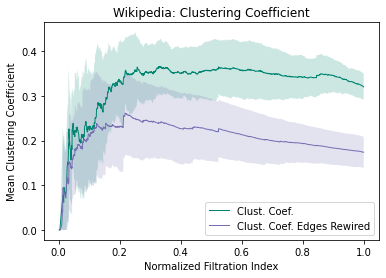

In [25]:
plot_curve_normalized_idx(all_clust_coef, curve_label = 'Clust. Coef.', curve_color = '#018571')
plot_curve_normalized_idx(all_clust_coef_edge_rewired, curve_label = 'Clust. Coef. Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_clust_coef_latticized, curve_label = 'Clust. Coef. Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Clustering Coefficient')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.legend(loc = 'lower right')
plt.savefig('Figures/C/all_Wiki_clust_coef_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


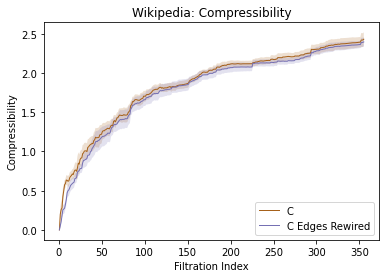

In [26]:
plot_curve(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve(all_C_edge_rewired, curve_label = 'C Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_C_latticized, curve_label = 'C Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = 'lower right')
plt.savefig('Figures/C/all_Wiki_C.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


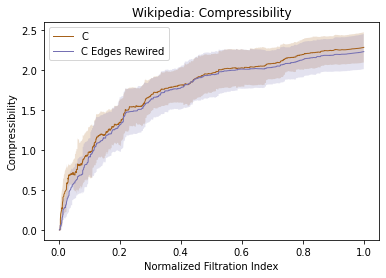

In [27]:
plot_curve_normalized_idx(all_C, curve_label = 'C', curve_color = '#a6611a')
plot_curve_normalized_idx(all_C_edge_rewired, curve_label = 'C Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_C_latticized, curve_label = 'C Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = 'upper left')
plt.savefig('Figures/C/all_Wiki_C_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


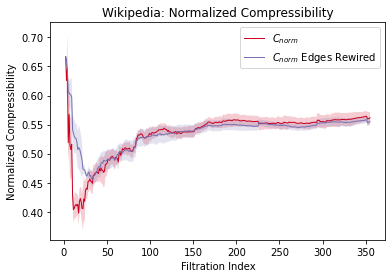

In [28]:
plot_curve(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve(all_C_norm_edge_rewired, curve_label = '$C_{norm}$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_C_norm_latticized, curve_label = '$C_{norm}$ Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = 'upper right')
plt.savefig('Figures/C/all_Wiki_C_norm.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


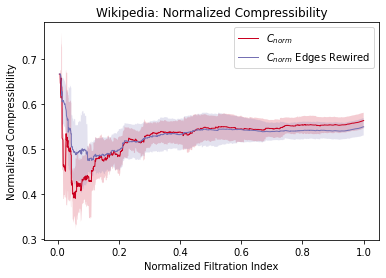

In [29]:
plot_curve_normalized_idx(all_C_norm, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plot_curve_normalized_idx(all_C_norm_edge_rewired, curve_label = '$C_{norm}$ Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_C_norm_latticized, curve_label = '$C_{norm}$ Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Normalized Compressibility')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = 'upper right')
plt.savefig('Figures/C/all_Wiki_C_norm_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


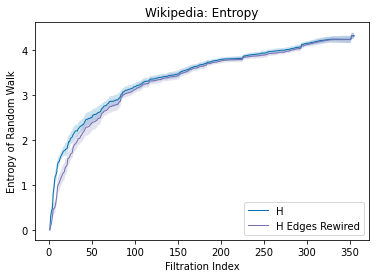

In [30]:
plot_curve(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve(all_entropy_edge_rewired, curve_label = 'H Edges Rewired', curve_color = '#7570b3')
# plot_curve(all_entropy_latticized, curve_label = 'H Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = 'lower right')
plt.savefig('Figures/C/all_Wiki_entropy.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


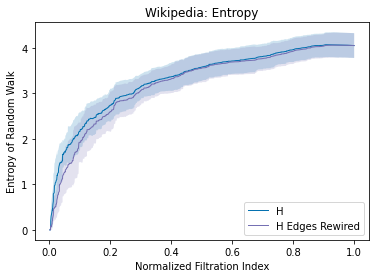

In [31]:
plot_curve_normalized_idx(all_entropy, curve_label = 'H', curve_color = '#0571b0')
plot_curve_normalized_idx(all_entropy_edge_rewired, curve_label = 'H Edges Rewired', curve_color = '#7570b3')
# plot_curve_normalized_idx(all_entropy_latticized, curve_label = 'H Latticized', curve_color = '#d95f02')
plt.title('Wikipedia: Entropy')
plt.xlabel('Normalized Filtration Index')
plt.ylabel('Entropy of Random Walk')
plt.legend(loc = 'lower right')
plt.savefig('Figures/C/all_Wiki_entropy_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## One Topic

In [32]:
topic_ID = 'software_engineering'

data_dict = sio.loadmat(base_path + topic_ID + '_C.mat')

num_nodes = data_dict['n']

clust_coef = np.squeeze(data_dict['clust_coef'])
clust_coef_edge_rewired = data_dict['clust_coef_edge_rewired']
clust_coef_latticized = data_dict['clust_coef_latticized']

C = np.squeeze(data_dict['C'])
C_edge_rewired = data_dict['C_edge_rewired']
C_latticized = data_dict['C_latticized']

C_norm = np.squeeze(data_dict['C_norm'])
C_norm_edge_rewired = data_dict['C_norm_edge_rewired']
C_norm_latticized = data_dict['C_norm_latticized']

entropy = np.squeeze(data_dict['entropy'])
entropy_edge_rewired = data_dict['entropy_edge_rewired']
entropy_latticized = data_dict['entropy_latticized']

X = np.arange(num_nodes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


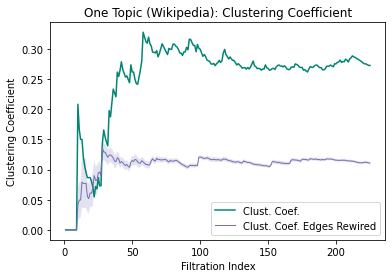

In [33]:
plt.plot(X, clust_coef, color = '#018571', label = 'Clust. Coef.')
plot_curve(clust_coef_edge_rewired, curve_label = 'Clust. Coef. Edges Rewired', curve_color = '#7570b3')
# plot_curve(clust_coef_latticized, curve_label = 'Clust. Coef. Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): Clustering Coefficient')
plt.xlabel('Filtration Index')
plt.ylabel('Clustering Coefficient')
plt.legend(loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


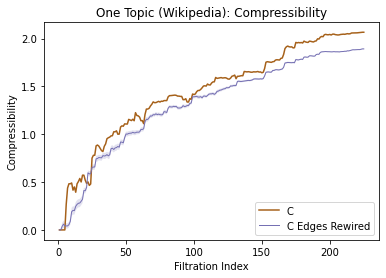

In [34]:
plt.plot(X, C, color = '#a6611a', label = 'C')
plot_curve(C_edge_rewired, curve_label = 'C Edges Rewired', curve_color = '#7570b3')
# plot_curve(C_latticized, curve_label = 'C Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.legend(loc = 'lower right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


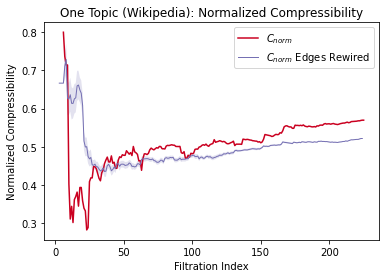

In [35]:
plt.plot(X, C_norm, color = '#ca0020', label = '$C_{norm}$')
plot_curve(C_norm_edge_rewired, curve_label = '$C_{norm}$ Edges Rewired', curve_color = '#7570b3')
# plot_curve(C_norm_latticized, curve_label = '$C_{norm}$ Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): Normalized Compressibility')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.legend(loc = 'upper right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


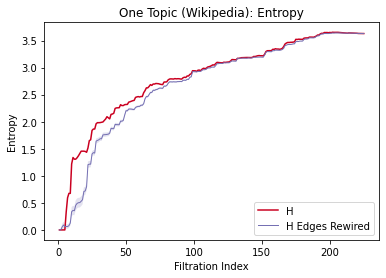

In [36]:
plt.plot(X, entropy, color = '#ca0020', label = 'H')
plot_curve(entropy_edge_rewired, curve_label = 'H Edges Rewired', curve_color = '#7570b3')
# plot_curve(entropy_latticized, curve_label = 'H Latticized', curve_color = '#d95f02')
plt.title('One Topic (Wikipedia): Entropy')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.legend(loc = 'lower right')

# Simulated Networks

In [37]:
data_path = '/content/drive/My Drive/Curiosity_v8/Simulations/simulated_nets_C.mat'
data_dict = sio.loadmat(data_path)

## Constant Probability Model

In [38]:
clust_coef_CP = data_dict['clust_coef_CP']
C_CP = data_dict['C_CP']
C_norm_CP = data_dict['C_norm_CP']
entropy_CP = data_dict['entropy_CP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


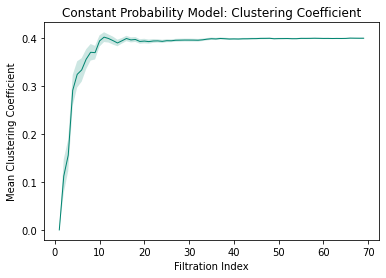

In [39]:
plot_curve(clust_coef_CP, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Constant Probability Model: Clustering Coefficient')
plt.savefig('Figures/C/constant_probability_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

In [40]:
# plot_curve_normalized_idx(clust_coef_CP, curve_label = 'Clust. Coef.', curve_color = '#018571')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Mean Clustering Coefficient')
# plt.title('Constant Probability Model: Clustering Coefficient')
# plt.savefig('Figures/C/constant_probability_clust_coef_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


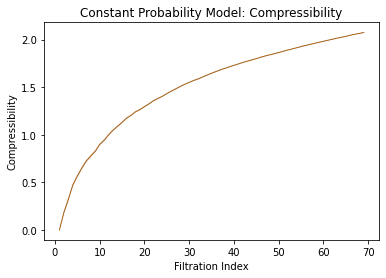

In [41]:
plot_curve(C_CP, curve_label = 'C', curve_color = '#a6611a')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.title('Constant Probability Model: Compressibility')
plt.savefig('Figures/C/constant_probability_C.pdf', transparent = True, bbox_inches = 'tight')

In [42]:
# plot_curve_normalized_idx(C_CP, curve_label = 'C', curve_color = '#a6611a')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Compressibility')
# plt.title('Constant Probability Model: Compressibility')
# plt.savefig('Figures/C/constant_probability_C_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


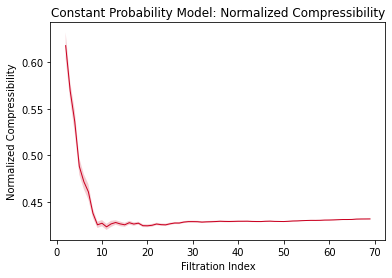

In [43]:
plot_curve(C_norm_CP, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Constant Probability Model: Normalized Compressibility')
plt.savefig('Figures/C/constant_probability_C_norm.pdf', transparent = True, bbox_inches = 'tight')

In [44]:
# plot_curve_normalized_idx(C_norm_CP, curve_label = '$C_{norm}$', curve_color = '#ca0020')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Normalized Compressibility')
# plt.title('Constant Probability Model: Normalized Compressibility')
# plt.savefig('Figures/C/constant_probability_C_norm_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


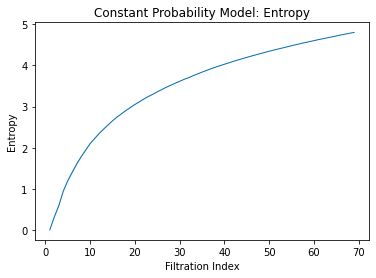

In [45]:
plot_curve(entropy_CP, curve_label = 'H', curve_color = '#0571b0')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.title('Constant Probability Model: Entropy')
plt.savefig('Figures/C/constant_probability_entropy.pdf', transparent = True, bbox_inches = 'tight')

In [46]:
# plot_curve_normalized_idx(entropy_CP, curve_label = 'H', curve_color = '#0571b0')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Entropy')
# plt.title('Constant Probability Model: Entropy')
# plt.savefig('Figures/C/constant_probability_entropy_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## Proportional Probability Model

In [47]:
clust_coef_PP = data_dict['clust_coef_PP']
C_PP = data_dict['C_PP']
C_norm_PP = data_dict['C_norm_PP']
entropy_PP = data_dict['entropy_PP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


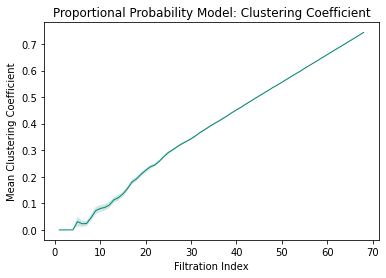

In [48]:
plot_curve(clust_coef_PP, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Proportional Probability Model: Clustering Coefficient')
plt.savefig('Figures/C/proportional_probability_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

In [49]:
# plot_curve_normalized_idx(clust_coef_PP, curve_label = 'Clust. Coef.', curve_color = '#018571')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Mean Clustering Coefficient')
# plt.title('Proportional Probability Model: Clustering Coefficient')
# plt.savefig('Figures/C/proportional_probability_clust_coef_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


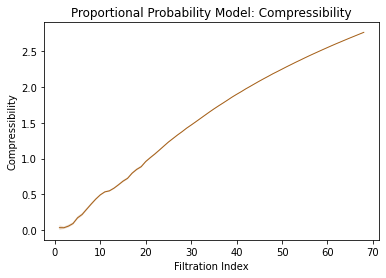

In [50]:
plot_curve(C_PP, curve_label = 'C', curve_color = '#a6611a')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.title('Proportional Probability Model: Compressibility')
plt.savefig('Figures/C/proportional_probability_C.pdf', transparent = True, bbox_inches = 'tight')

In [51]:
# plot_curve_normalized_idx(C_PP, curve_label = 'C', curve_color = '#a6611a')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Compressibility')
# plt.title('Proportional Probability Model: Compressibility')
# plt.savefig('Figures/C/proportional_probability_C_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


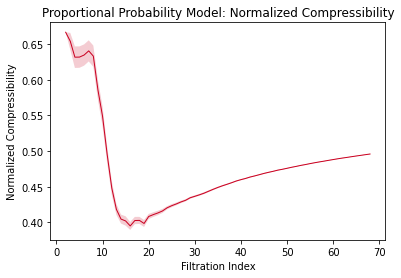

In [52]:
plot_curve(C_norm_PP, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Proportional Probability Model: Normalized Compressibility')
plt.savefig('Figures/C/proportional_probability_C_norm.pdf', transparent = True, bbox_inches = 'tight')

In [53]:
# plot_curve_normalized_idx(C_norm_PP, curve_label = '$C_{norm}$', curve_color = '#ca0020')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Normalized Compressibility')
# plt.title('Proportional Probability Model: Normalized Compressibility')
# plt.savefig('Figures/C/proportional_probability_C_norm_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


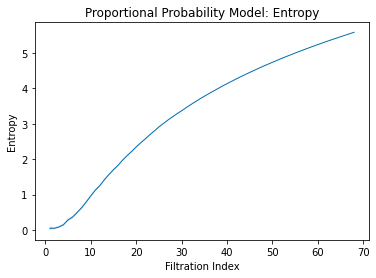

In [54]:
plot_curve(entropy_PP, curve_label = 'H', curve_color = '#0571b0')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.title('Proportional Probability Model: Entropy')
plt.savefig('Figures/C/proportional_probability_entropy.pdf', transparent = True, bbox_inches = 'tight')

In [55]:
# plot_curve_normalized_idx(entropy_PP, curve_label = 'H', curve_color = '#0571b0')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Entropy')
# plt.title('Proportional Probability Model: Entropy')
# plt.savefig('Figures/C/proportional_probability_entropy_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

## Preferential Attachment Model

In [56]:
clust_coef_PA = data_dict['clust_coef_PA']
C_PA = data_dict['C_PA']
C_norm_PA = data_dict['C_norm_PA']
entropy_PA = data_dict['entropy_PA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


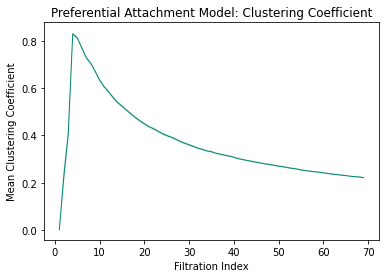

In [57]:
plot_curve(clust_coef_PA, curve_label = 'Clust. Coef.', curve_color = '#018571')
plt.xlabel('Filtration Index')
plt.ylabel('Mean Clustering Coefficient')
plt.title('Preferential Attachment Model: Clustering Coefficient')
plt.savefig('Figures/C/preferential_attachment_clust_coef.pdf', transparent = True, bbox_inches = 'tight')

In [58]:
# plot_curve_normalized_idx(clust_coef_PA, curve_label = 'Clust. Coef.', curve_color = '#018571')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Mean Clustering Coefficient')
# plt.title('Preferential Attachment Model: Clustering Coefficient')
# plt.savefig('Figures/C/preferential_attachment_clust_coef_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


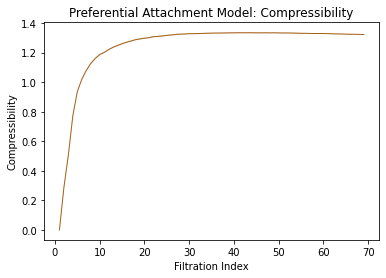

In [59]:
plot_curve(C_PA, curve_label = 'C', curve_color = '#a6611a')
plt.xlabel('Filtration Index')
plt.ylabel('Compressibility')
plt.title('Preferential Attachment Model: Compressibility')
plt.savefig('Figures/C/preferential_attachment_C.pdf', transparent = True, bbox_inches = 'tight')

In [60]:
# plot_curve_normalized_idx(C_PA, curve_label = 'C', curve_color = '#a6611a')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Compressibility')
# plt.title('Preferential Attachment Model: Compressibility')
# plt.savefig('Figures/C/preferential_attachment_C_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


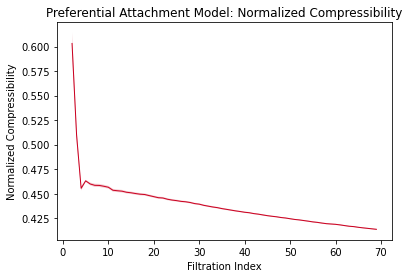

In [61]:
plot_curve(C_norm_PA, curve_label = '$C_{norm}$', curve_color = '#ca0020')
plt.xlabel('Filtration Index')
plt.ylabel('Normalized Compressibility')
plt.title('Preferential Attachment Model: Normalized Compressibility')
plt.savefig('Figures/C/preferential_attachment_C_norm.pdf', transparent = True, bbox_inches = 'tight')

In [62]:
# plot_curve(C_norm_PA, curve_label = '$C_{norm}$', curve_color = '#ca0020')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Normalized Compressibility')
# plt.title('Preferential Attachment Model: Normalized Compressibility')
# plt.savefig('Figures/C/preferential_attachment_C_norm_norm_idx.pdf', transparent = True, bbox_inches = 'tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


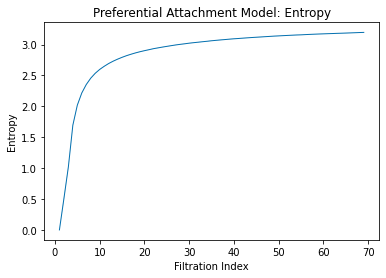

In [63]:
plot_curve(entropy_PA, curve_label = 'H', curve_color = '#0571b0')
plt.xlabel('Filtration Index')
plt.ylabel('Entropy')
plt.title('Preferential Attachment Model: Entropy')
plt.savefig('Figures/C/preferential_attachment_entropy.pdf', transparent = True, bbox_inches = 'tight')

In [64]:
# plot_curve_normalized_idx(entropy_PA, curve_label = 'H', curve_color = '#0571b0')
# plt.xlabel('Normalized Filtration Index')
# plt.ylabel('Entropy')
# plt.title('Preferential Attachment Model: Entropy')
# plt.savefig('Figures/C/preferential_attachment_entropy_norm_idx.pdf', transparent = True, bbox_inches = 'tight')